In [1]:
import numpy as np
import math as mt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress as lr
from PIL import Image
from typing import List
import rasterio
from scipy.ndimage import zoom

In [7]:
def box_count(raster: np.ndarray, box_size: int):
    mask = ~(raster == -9999)
    # print(mask)
    rows, cols = raster.shape
    total_box_count = 0 
    box_count_for_size = 0
    for i in range(0, rows, box_size):
        for j in range(0, cols, box_size):
            end_row = min(i + box_size, rows)
            end_col = min(j + box_size, cols)
            # print(f"For location {i}, {j}, end row is {end_row} and end col is {end_col}")
            current_slice = raster[i:end_row, j:end_col]
            current_mask = mask[i:end_row, j:end_col]

            valid_vals = current_slice[current_mask]
            if valid_vals.size > 0:
                max_val = np.max(valid_vals)
                min_val = np.min(valid_vals)
                # print(f"max_val = {max_val}, min_val={min_val}")
                hdiff = max_val - min_val # if box_size = 1 - hdiff = 0 // Times 2 to account for 2m by 2m by 1m scale
                box_count = mt.ceil(hdiff / (2*box_size))
                box_count_for_size += box_count
                total_box_count += box_count
        # print(f"Total box count for box size {size} is {box_count_for_size}")
    return total_box_count

In [8]:
def fractal_dimension(tif_file: str, box_sizes: List[int]):
    with rasterio.open(tif_file) as src:
        image = src.read(1)
    raster = np.array(image)

    counts = []
    b_size = []

    for size in box_sizes:
        b_size.append(size)
        count = box_count(raster=raster, box_size=size)
        counts.append(count) 
    
    log_eps = np.log(1 / np.array(box_sizes))
    log_counts = np.log(counts)

    slope, intercept, *_ = lr(log_eps, log_counts)

    plt.figure(figsize=(8, 6))
    plt.plot(log_eps, log_counts, 'o', label='Log-Log Data')
    plt.plot(log_eps, slope * log_eps + intercept, 'r', label=f'Fit: slope = {slope:.4f}')
    plt.xlabel('log(1/ε)')
    plt.ylabel('log(N(ε))')
    plt.title('Fractal Dimension Estimation')
    plt.legend()
    plt.grid(True)
    plt.show()

    return slope
    

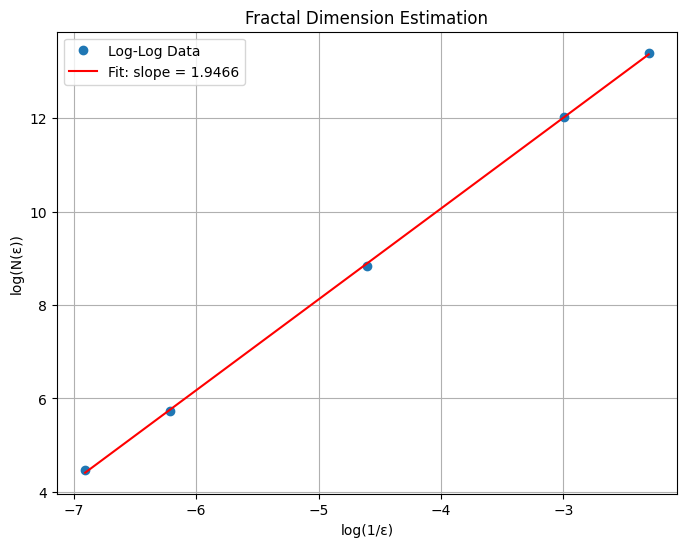

np.float64(1.9465612638320273)

In [11]:
list_of_box_sizes = [10, 20, 100, 500, 1000]
path = 'datasets/temp/SETSM_s2s041_WV02_20240505_10300100FA6CA900_10300100FAAD4400_2m_seg5_dem.tif'
fractal_dimension(tif_file=path, box_sizes=list_of_box_sizes)

In [5]:
def fractal_dimension_rescaled(tif_file: str, box_sizes: List[int]):
    with rasterio.open(tif_file) as src:
        image = src.read(1)
    raster = np.array(image)
    scaled = zoom(raster, zoom=2, order=1)
    counts = []
    b_size = []

    for size in box_sizes:
        b_size.append(size)
        count = box_count(raster=scaled, box_size=size)
        counts.append(count) 
    
    log_eps = np.log(1 / np.array(box_sizes))
    log_counts = np.log(counts)

    slope, intercept, *_ = lr(log_eps, log_counts)

    plt.figure(figsize=(8, 6))
    plt.plot(log_eps, log_counts, 'o', label='Log-Log Data')
    plt.plot(log_eps, slope * log_eps + intercept, 'r', label=f'Fit: slope = {slope:.4f}')
    plt.xlabel('log(1/ε)')
    plt.ylabel('log(N(ε))')
    plt.title('Fractal Dimension Estimation')
    plt.legend()
    plt.grid(True)
    plt.show()

    return slope


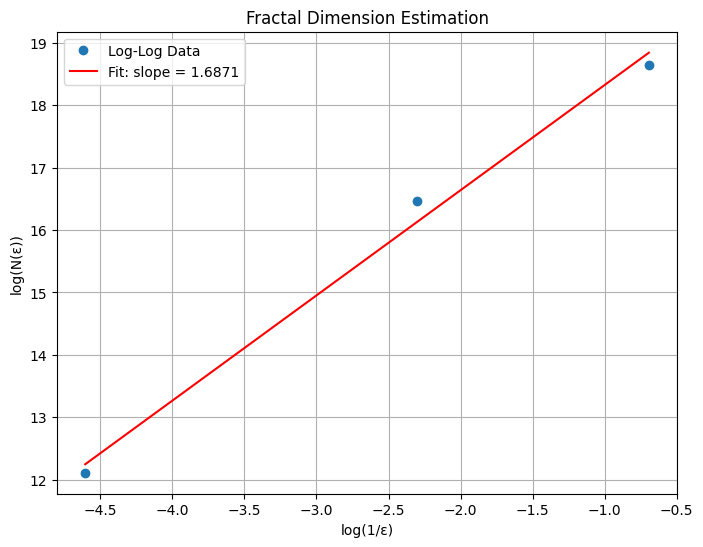

np.float64(1.6871197031539504)

In [6]:
list_of_box_sizes = [2, 10, 100]
path = 'datasets/temp/SETSM_s2s041_WV02_20240505_10300100FA6CA900_10300100FAAD4400_2m_seg5_dem.tif'
fractal_dimension_rescaled(tif_file=path, box_sizes=list_of_box_sizes)